## Graphs

> https://www.youtube.com/playlist?list=PL_z_8CaSLPWcn5bKG8UMI0St2D5EmQszx

---

In [122]:
from typing import List
import sys

import networkx as nx
import matplotlib.pyplot as plt

### Basic Implementation

In [36]:
from typing import List, Tuple, Dict, Optional

class Graph:
    """
    A class to represent an undirected graph using an edge list, adjacency matrix, and adjacency list.

    Attributes:
        edgelist (list): List of edges where each edge is represented as a tuple (a, b).
        nodeslist (list): List of unique nodes in the graph.
        adjacency_matrix (list[list]): Adjacency matrix representation of the graph.
        adjacency_list (dict): Adjacency list representation of the graph.
    """

    def __init__(self, edgelist: List[Tuple[int, int]]):
        """
        Initializes the Graph object with an edge list.

        Args:
            edgelist (list): List of edges where each edge is represented as a tuple (a, b).
        """
        self.edgelist = edgelist
        self.nodeslist = []  # Stores unique nodes in the graph
        self.adjacency_matrix = None  # Adjacency matrix representation
        self.adjacency_list = {}  # Adjacency list representation

    def get_unique_nodes(self) -> List[int]:
        """
        Extracts and returns a list of unique nodes from the edge list.

        Returns:
            list: A list of unique nodes in the graph.
        """
        nodes = set()  # Use a set to avoid duplicates

        # Iterate through the edge list and add nodes to the set
        for (a, b) in self.edgelist:
            nodes.add(a)
            nodes.add(b)

        # Convert the set to a list and store it in the nodeslist attribute
        self.nodeslist = list(nodes)
        return self.nodeslist

    def print_graph(self) -> None:
        """
        Prints the graph by iterating through the adjacency matrix.
        Each edge is printed as "Node X: Neighbor: Y".

        Note:
            This method assumes that the adjacency matrix has already been constructed.
        """
        if not self.adjacency_matrix:
            print("Adjacency matrix is empty. Construct it first.")
            return

        # Iterate through the adjacency matrix and print edges
        for row_idx, row in enumerate(self.adjacency_matrix):
            for col_idx, col in enumerate(row):
                if col == 1:  # If there's an edge between row_idx and col_idx
                    print(f"Node {row_idx}: Neighbor: {col_idx}")

    def display_adjacency_matrix(self) -> None:
        """
        Displays the adjacency matrix in a readable format.

        Note:
            This method assumes that the adjacency matrix has already been constructed.
        """
        if not self.adjacency_matrix:
            print("Adjacency matrix is empty. Construct it first.")
            return

        # Print each row of the adjacency matrix
        for row in self.adjacency_matrix:
            print(" ".join(map(str, row)))

    def construct_adjacency_matrix(self) -> List[List[int]]:
        """
        Constructs the adjacency matrix representation of the graph.

        Returns:
            list[list]: The adjacency matrix of the graph.
        """
        if not self.edgelist:
            return None

        # Get the number of unique nodes
        num_nodes = len(self.get_unique_nodes())

        # Initialize a square matrix with all zeros
        matrix = [[0 for _ in range(num_nodes + 1)] for _ in range(num_nodes + 1)]

        # Populate the adjacency matrix based on the edge list
        for a, b in self.edgelist:
            matrix[a][b] = 1  # Mark the edge from a to b
            matrix[b][a] = 1  # Mark the edge from b to a (undirected graph)

        # Store the matrix in the adjacency_matrix attribute
        self.adjacency_matrix = matrix
        return self.adjacency_matrix

    def construct_adjacency_list(self) -> Dict[str, set]:
        """
        Constructs the adjacency list representation of the graph.

        Returns:
            dict: The adjacency list of the graph where keys are node names (as strings)
                  and values are sets of neighboring nodes.
        """
        if not self.edgelist:
            return {}

        # Iterate through the edge list and populate the adjacency list
        for a, b in self.edgelist:
            str_a, str_b = str(a), str(b)  # Convert nodes to strings for dictionary keys

            # Add b to the neighbors of a
            if str_a in self.adjacency_list:
                self.adjacency_list[str_a].add(str_b)
            else:
                self.adjacency_list[str_a] = {str_b}

            # Add a to the neighbors of b
            if str_b in self.adjacency_list:
                self.adjacency_list[str_b].add(str_a)
            else:
                self.adjacency_list[str_b] = {str_a}

        return self.adjacency_list

In [ ]:
edgelist = [
    (1,2), (2,3), (3,4), (4,2), (1,3)
] # list of edges
graph = Graph(edgelist=edgelist)

In [38]:
matrix = graph.construct_adjacency_matrix()

In [39]:
matrix

[[0, 0, 0, 0, 0],
 [0, 0, 1, 1, 0],
 [0, 1, 0, 1, 1],
 [0, 1, 1, 0, 1],
 [0, 0, 1, 1, 0]]

In [40]:
graph.print_graph()

Node 1: Neighbor: 2
Node 1: Neighbor: 3
Node 2: Neighbor: 1
Node 2: Neighbor: 3
Node 2: Neighbor: 4
Node 3: Neighbor: 1
Node 3: Neighbor: 2
Node 3: Neighbor: 4
Node 4: Neighbor: 2
Node 4: Neighbor: 3


In [41]:
adjacency_list = graph.construct_adjacency_list()

In [42]:
adjacency_list

{'1': {'2', '3'}, '2': {'1', '3', '4'}, '3': {'1', '2', '4'}, '4': {'2', '3'}}

In [45]:
x = [1,2,4]

x.pop(0)

x

[2, 4]

### BFS

__Algorithm__:



In [103]:
class Queue:

    def __init__(self):
        self.queue = []

    def pop(self) -> int:
        if not self.queue:
            return None
        
        return self.queue.pop(0)

    def push(self, elem: int):
        self.queue.append(elem)

    def __repr__(self):
        return str(self.queue)
    
    def is_empty(self):
        return len(self.queue) == 0


In [104]:
queue = Queue()

queue.push(4)
queue.push(1)
queue.push(2)
queue.push(3)

print (queue)

[4, 1, 2, 3]


In [105]:
queue = Queue()

queue.is_empty()

True

In [48]:
queue.pop()

4

In [49]:
queue.pop()

1

In [50]:
print (queue)

[2, 3]


In [129]:
def bfs(g: Graph, src_node: int) -> list:
    """
    Perform BFS traversal on a graph starting from src_node.
    Uses a custom Queue class for managing traversal.
    Returns a list of nodes in the order they are visited.
    """

    # Step 1: Get adjacency list from graph
    g_adjacency_list = g.construct_adjacency_list()

    visited = set()    # Keeps track of visited nodes
    output = []        # Stores BFS traversal result

    queue = Queue()
    queue.push(src_node)  # Initialize with the source node
    visited.add(src_node)

    # Step 2: Process nodes level by level using the queue
    while not queue.is_empty():

        node = queue.pop()
        output.append(node)  # Visit the current node

        # Step 3: Traverse neighbors of the current node
        for neighbor_ in g_adjacency_list[str(node)]:

            if int(neighbor_) not in visited:
                visited.add(int(neighbor_))     # Mark neighbor as visited
                queue.push(int(neighbor_))      # Add neighbor to queue

    return output

```
Dry Run for Input src_node = 0

With:

edgelist = [(1, 0), (0, 5), (0, 2), (2, 3), (3, 4)]

Adjacency List (undirected graph):

{
  0: [1, 5, 2],
  1: [0],
  5: [0],
  2: [0, 3],
  3: [2, 4],
  4: [3]
}



⸻

🔄 Step-by-Step BFS Execution
	•	Start: queue = [0], visited = {}, output = []

	1.	Pop 0 → output = [0]
Neighbors = [1, 5, 2] → enqueue all
queue = [1, 5, 2], visited = {1, 5, 2}
	2.	Pop 1 → output = [0, 1]
Neighbors = [0] → already visited
queue = [5, 2]
	3.	Pop 5 → output = [0, 1, 5]
Neighbors = [0] → already visited
queue = [2]
	4.	Pop 2 → output = [0, 1, 5, 2]
Neighbors = [0, 3] → 3 is unvisited → enqueue
queue = [3], visited = {1, 2, 3, 5}
	5.	Pop 3 → output = [0, 1, 5, 2, 3]
Neighbors = [2, 4] → 4 is unvisited → enqueue
queue = [4], visited = {1, 2, 3, 4, 5}
	6.	Pop 4 → output = [0, 1, 5, 2, 3, 4]
Neighbors = [3] → already visited
queue = [] → end

⸻

✅ Final Output:

[0, 1, 5, 2, 3, 4]

```


In [126]:
def visualize_graph(edgelist: list):
    G = nx.Graph()
    G.add_edges_from(edgelist)

    # Draw the graph
    plt.figure(figsize=(4, 4))
    pos = nx.spring_layout(G, seed=42)  # positions nodes for visual clarity
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1000, font_size=14, edge_color='gray')

    # Optional: Add edge labels if needed
    # nx.draw_networkx_edge_labels(G, pos)

    plt.title("Graph Visualization", fontsize=11)
    plt.show()

In [130]:
edgelist = [
    (1, 0), (0, 5), (0, 2), (2, 3), (3, 4)
] # list of edges

g = Graph(edgelist)

bfs(g, src_node=0)

[0, 2, 1, 5, 3, 4]

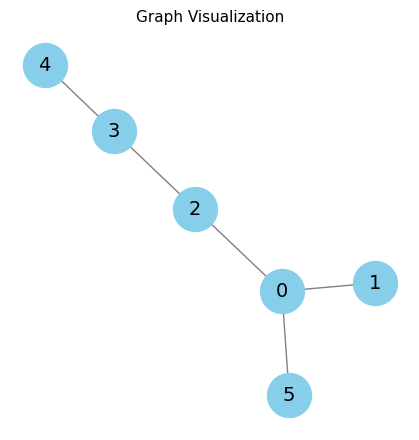

In [128]:
visualize_graph(edgelist)

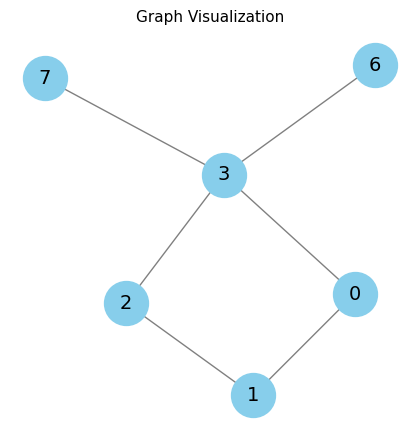

In [131]:
edgelist = [
    (1,0), (1,2), (0,3), (2,3), (3,6), (3,7)
]

visualize_graph(edgelist)

In [ ]:
g = Graph(edgelist)

bfs(g, src_node=3)

[3, 2, 7, 0, 6, 1]